# Laboratorium 2 - Convolutional Neural Network cz. II

# *Zadanie 1* - Convolutional Neural Network (Max 1h 15min):

**Zaimplementuj** model Convolutional Neural Networks (CNNs) do klasyfikacji:

* IMDB
* Boston Housing price

Wszystkie wspomniane zbiory danych znajduja się module Datasets Keras.

Dla datasetu IMDB może przydac sie poniższa implemtacja. Zapoznaj się z nia i dowiedz czym sa warstwy:
* Conv1D,
* Embedding,
* GlobalMaxPooling1D.

Czym jest **Tokenizer**? 

```
# Convert the data to one-hot encoding
tokenizer = Tokenizer(num_words=10000)
X_train = tokenizer.sequences_to_matrix(X_train, mode='binary')
X_test = tokenizer.sequences_to_matrix(X_test, mode='binary')
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the model architecture
model = Sequential()
model.add(Embedding(10000, 128, input_length=10000))
model.add(Conv1D(64, 3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(46, activation='softmax'))
```

Może byc przydatne rownież coś takiego:
```
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the IMDB dataset and keep only the top 5000 most frequent words
word_index = imdb.get_word_index()
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

# Pad sequences to the same length
max_review_length = 500
X_train = pad_sequences(X_train, maxlen=max_review_length)
X_test = pad_sequences(X_test, maxlen=max_review_length)

```

Czym jest **pad_sequences** ?


Dla modelu Boston

```
# Normalize the data
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)
```

# **Model Convolutional Neural Networks (CNNs) do klasyfikacji IMDB:\**

In [ ]:
from keras.utils import pad_sequences
from keras.datasets import imdb

# Load the IMDB dataset and keep only the top 5000 most frequent words
word_index = imdb.get_word_index()
top_words = 5000
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words=top_words)

# Pad sequences to the same length
max_review_length = 500
X_train = pad_sequences(X_train, maxlen=max_review_length)
X_test = pad_sequences(X_test, maxlen=max_review_length)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
# Obtain 3 texts
for i in np.random.randint(0, len(X_train), 3):
  INDEX_FROM=3   # word index offset
  word_to_id = imdb.get_word_index()
  word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
  word_to_id["<PAD>"] = 0
  word_to_id["<START>"] = 1
  word_to_id["<UNK>"] = 2
  word_to_id["<UNUSED>"] = 3

  id_to_word = {value:key for key,value in word_to_id.items()}
  print('=================================================')
  print(f'Sample = {i} | Length = {len(X_train[i])}')
  print('=================================================')
  print(' '.join(id_to_word[id] for id in X_train[i] ))

# Define the Keras model
model = keras.Sequential()
model.add(layers.Embedding(top_words, 15, input_length=10000))
model.add(layers.Dropout(0.50))
model.add(layers.Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(layers.Dropout(0.50))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.50))
model.add(layers.Dense(46, activation='sigmoid'))

Sample = 3144 | Length = 10000
<PAD> <START> <START> <PAD> <START> <START> <START> <START> <START> <START> <START> <PAD> <START> <START> <PAD> <PAD> <START> <START> <PAD> <PAD> <PAD> <START> <PAD> <START> <START> <START> <PAD> <START> <PAD> <START> <START> <START> <PAD> <PAD> <PAD> <PAD> <PAD> <START> <START> <PAD> <START> <START> <PAD> <START> <PAD> <START> <PAD> <PAD> <PAD> <PAD> <START> <START> <START> <PAD> <PAD> <PAD> <PAD> <START> <PAD> <PAD> <PAD> <PAD> <START> <PAD> <PAD> <PAD> <START> <PAD> <START> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <START> <START> <START> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <START> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <START> <PAD> <START> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <START> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <START> <START> <PAD> <START> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <START> <PAD> <START> <START> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <START> <PA

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Give a summary
model.summary()

# Train the model
history = model.fit(X_train, Y_train, epochs=15, verbose=True, validation_split=0.20)
score = model.evaluate(X_test, Y_test, batch_size=batch_size, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 10000, 15)         75000     
                                                                 
 dropout_12 (Dropout)        (None, 10000, 15)         0         
                                                                 
 conv1d_8 (Conv1D)           (None, 10000, 32)         992       
                                                                 
 dropout_13 (Dropout)        (None, 10000, 32)         0         
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 5000, 32)         0         
 1D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 160000)            0         
                                                     

# **Model Convolutional Neural Networks (CNNs) do klasyfikacji Boston Housing price\**

In [ ]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Embedding, GlobalMaxPooling1D
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the Boston Housing Price dataset
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

# Normalize the data
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Define the model architecture
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(train_data.shape[1], 1)))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Reshape the data for the CNN input
train_data = np.expand_dims(train_data, axis=2)
test_data = np.expand_dims(test_data, axis=2)

# Fit the model to the training data
model.fit(train_data, train_targets, validation_split=0.2, epochs=100, batch_size=16)

# Evaluate the model on the test data
test_loss, test_mae = model.evaluate(test_data, test_targets, verbose=0)
print(f'Test loss: {test_loss:.4f}')
print(f'Test mae: {test_mae:.4f}')

57026/57026 [==============================] - 0s 0us/step
Epoch 1/100
21/21 [==============================] - 1s 13ms/step - loss: 515.9229 - mae: 20.7715 - val_loss: 525.9072 - val_mae: 21.0394
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 403.3370 - mae: 17.8127 - val_loss: 383.8547 - val_mae: 17.4220
Epoch 3/100
21/21 [==============================] - 0s 6ms/step - loss: 257.9924 - mae: 13.5368 - val_loss: 216.7367 - val_mae: 12.2852
Epoch 4/100
21/21 [==============================] - 0s 5ms/step - loss: 145.5101 - mae: 9.9250 - val_loss: 125.6228 - val_mae: 8.9049
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 113.9900 - mae: 8.6583 - val_loss: 113.4113 - val_mae: 8.3401
Epoch 6/100
21/21 [==============================] - 0s 5ms/step - loss: 106.6908 - mae: 8.3094 - val_loss: 108.1969 - val_mae: 8.0450
Epoch 7/100
21/21 [==============================] - 0s 5ms/step - loss: 100.0077 - mae: 8.0137 - val_loss: 105.3274 - val_m

# Autoenkodery

**Autokodery**, zwane również autoenkoderami, pobierają dane wejściowe, przekształcają je w pewną reprezentację wewnętrzną, a następnie odtwarzają wynik przypominający dane wejściowe. Dokładniej, autoenkodery odnoszą się do sieci neuronowych, które potrafią uczyć się reprezentacji danych wejściowych (kodowania).

Autoenkodery zawsze składają się z dwóch elementów:

* kodera, który przekształca dane wejściowe do postaci reprezentacji,
* dekodera, który przekształca dane z postaci reprezentacji na dane wyjściowe.

Autoenkodery to rodzaj sztucznych sieci neuronowych, które są zdolne do nauki reprezentacji danych wejściowych. Najczęściej wyróżnia się dwa rodzaje autoenkoderów - niedopełniony i przepełniony. **Niedopełniony autoenkoder** ma mniej warstw ukrytych niż liczba danych wejściowych. To wymusza na nim znalezienie innej reprezentacji danych, ponieważ nie może po prostu skopiować i przekazać dalej danych wejściowych. **Przepełniony autoenkoder** ma więcej warstw ukrytych niż liczba danych wejściowych. Dzięki temu może uzyskać więcej cech. Jednak, w takim przypadku autoenkoder może się nauczyć po prostu przekazywać dane do kolejnych węzłów ukrytych, pomijając wiele innych, co uniemożliwia dodatkową ekstrakcję cech.





Podział autoenkoderów:

* Autoenkodery stosowe lub głębokie

Autoenkodery, podobnie jak sieci neuronowe, mogą składać się z wielu warstw ukrytych. Dodawanie kolejnych warstw ma na celu wyuczenie modelu bardziej skomplikowanych zależności i kodowań. W przypadku głębokich autoenkoderów najczęściej stosuje się symetryczną architekturę, zwana "kanapką", zmniejszając kolejną liczbę warstw ukrytych o połowę.

* Autoenkodery odszumiające (ang. denoising autoencoders)

Inną ciekawą metodą do wydobywania cech i uniknięcia nadmiernego dopasowania autoenkodera do danych jest dodanie szumu lub zamaskowanie niektórych wartości wejściowych w sposób stochastyczny. Następnie model jest trenowany do odzyskiwania oryginalnych danych wejściowych (uwaga: tych nieuszkodzonych bez dodanego szumu). Pierwsze koncepcje wykorzystywania autoenkoderów do odszumiania pochodzą z lat 80. Bardziej znana jest jednak praca naukowa Pascala Vincenta z Uniwersytetu w Montrealu w Kanadzie, który w 2008 roku pokazał, że autoenkodery są świetnym narzędziem do wydobywania cech.

* Autoenkodery rzadkie (ang. sparse autoencoders)

Rzadkie autoenkodery nakładają ograniczenie na funkcję aktywacji warstw ukrytych, aby uniknąć nadmiernego dopasowania i poprawić odporność. Ten rodzaj autoenkodera pozwala na aktywację tylko niewielkiej liczby jednostek w ukrytej warstwie w tym samym czasie. Innymi słowy, jeden ukryty neuron powinien być nieaktywny przez większość czasu.

* Autoenkodery kurczliwe (ang. contractive autoencoders)

Podobnie jak rzadkie autoenkodery, modyfikują funkcję straty, ale w ten sposób, aby ukarać reprezentację, która jest zbyt wrażliwa na dane wejściowe. Tym samym poprawia odporność na małe zaburzenia wokół punktów danych treningowych. Innymi słowy, dwa podobne do siebie przykłady wejściowe muszą mieć podobne kodowanie.

* Autoenkodery wariacyjne (ang. variational autoencoders)

VAE należą do klasy autoenkoderów generatywnych, czyli takich, które umieją tworzyć nowe dane przypominające te w zbiorze uczącym. Dodatkowo VAE są autoenkoderami probabilistycznymi, czyli generują częściowo losowe wyniki nawet po wyuczeniu modelu. Powiedziałbym, że mają standardową architekturę autoenkoderów: po koderze składającym się często z kilku warstw ukrytych mamy dekoder. Natomiast mamy tutaj drobną zmianę: koder nie generuje bezpośrednio nas

# Przykładowe implementacje Autoenkoderów

## Autoenkodery stosowe lub głęboki

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/50
235/235 [==============================] - 5s 5ms/step - loss: 0.2158 - val_loss: 0.1402
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1257 - val_loss: 0.1139
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1089 - val_loss: 0.1027
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1008 - val_loss: 0.0969
Epoch 5/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0963 - val_loss: 0.0933
Epoch 6/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0932 - val_loss: 0.0909
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0906 - val_loss: 0.0890
Epoch 8/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0886 - val_loss: 0.0871
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0870 - val_loss: 0.0859
Epoch 10/50
235/235 [==============

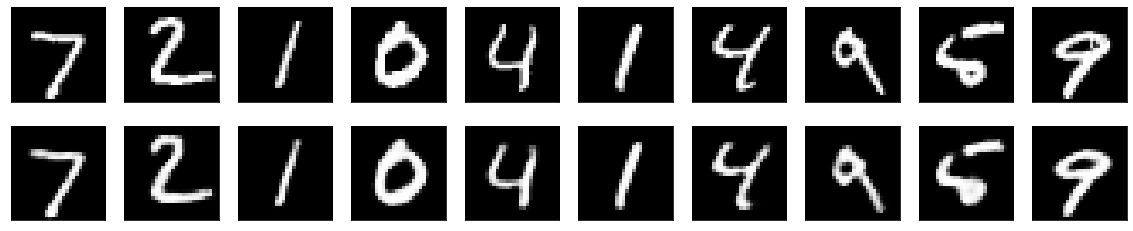

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np

# Wymiary obrazków MNIST
input_dim = 784

# Wyznaczamy wymiary warstw kodera i dekodera
encoding_dim1 = 256
encoding_dim2 = 128
encoding_dim3 = 64

# Definiujemy warstwy kodera
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim1, activation='relu')(input_img)
encoded = Dense(encoding_dim2, activation='relu')(encoded)
encoded = Dense(encoding_dim3, activation='relu')(encoded)

# Definiujemy warstwy dekodera
decoded = Dense(encoding_dim2, activation='relu')(encoded)
decoded = Dense(encoding_dim1, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Tworzymy model autoenkodera
autoencoder = Model(input_img, decoded)

# Kompilujemy model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Wczytujemy zbiór danych MNIST
from keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

# Normalizujemy dane i przekształcamy na wektor
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Trenujemy model
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Wizualizacja wyników
import matplotlib.pyplot as plt

# Zastosuj model na zestawie testowym
decoded_imgs = autoencoder.predict(x_test)

# Wypisz kilka obrazków testowych i odpowiadające im dekodowane wersje
n = 10  # Ile obrazków chcesz wyświetlić
plt.figure(figsize=(20, 4))
for i in range(n):
    # Obrazek testowy
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Dekodowana wersja obrazka
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Autoenkodery odszumiające (ang. denoising autoencoders)

Epoch 1/50
235/235 [==============================] - 4s 6ms/step - loss: 0.2449 - val_loss: 0.1818
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1664 - val_loss: 0.1539
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1484 - val_loss: 0.1418
Epoch 4/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1393 - val_loss: 0.1348
Epoch 5/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1331 - val_loss: 0.1302
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1291 - val_loss: 0.1270
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1257 - val_loss: 0.1242
Epoch 8/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1231 - val_loss: 0.1234
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1210 - val_loss: 0.1207
Epoch 10/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1192 - val_loss: 0.1195

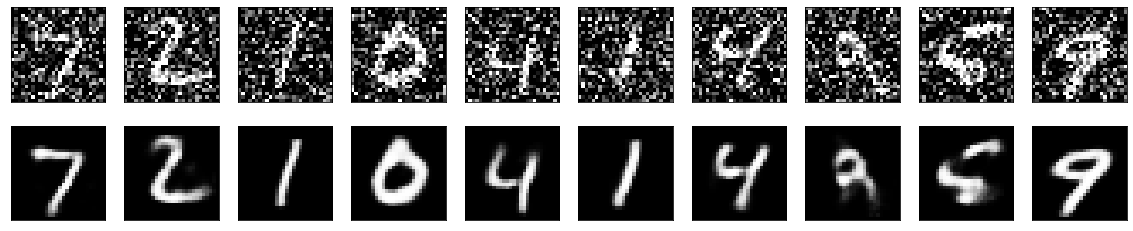

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np

# Wymiary obrazków MNIST
input_dim = 784

# Wyznaczamy wymiary warstw kodera i dekodera
encoding_dim1 = 256
encoding_dim2 = 128
encoding_dim3 = 64

# Definiujemy warstwy kodera
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim1, activation='relu')(input_img)
encoded = Dense(encoding_dim2, activation='relu')(encoded)
encoded = Dense(encoding_dim3, activation='relu')(encoded)

# Definiujemy warstwy dekodera
decoded = Dense(encoding_dim2, activation='relu')(encoded)
decoded = Dense(encoding_dim1, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Tworzymy model autoenkodera
autoencoder = Model(input_img, decoded)

# Kompilujemy model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Wczytujemy zbiór danych MNIST
(x_train, _), (x_test, _) = mnist.load_data()

# Normalizujemy i przekształcamy dane
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Dodajemy szum gaussowski do obrazków
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Przekształcamy dane na wektory
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
x_train_noisy = x_train_noisy.reshape((len(x_train_noisy), np.prod(x_train_noisy.shape[1:])))
x_test_noisy = x_test_noisy.reshape((len(x_test_noisy), np.prod(x_test_noisy.shape[1:])))

# Trenujemy model na danych z szumem
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Wizualizacja wyników
import matplotlib.pyplot as plt

# Zastosuj model na zestawie testowym
decoded_imgs = autoencoder.predict(x_test_noisy)

# Wypisz kilka obrazków testowych i odpowiadające im dekodowane wersje
n = 10  # Ile obrazków chcesz wyświetlić
plt.figure(figsize=(20, 4))
for i in range(n):
    # Obrazek testowy
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Odpowiadający mu obrazek zdekodowany przez model
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

## Autoenkodery rzadkie (ang. sparse autoencoders)

Epoch 1/50
235/235 [==============================] - 3s 6ms/step - loss: 0.4358 - val_loss: 0.2630
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2632 - val_loss: 0.2629
Epoch 3/50
235/235 [==============================] - 2s 6ms/step - loss: 0.2631 - val_loss: 0.2629
Epoch 4/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2631 - val_loss: 0.2627
Epoch 5/50
235/235 [==============================] - 2s 9ms/step - loss: 0.2631 - val_loss: 0.2627
Epoch 6/50
235/235 [==============================] - 2s 8ms/step - loss: 0.2631 - val_loss: 0.2629
Epoch 7/50
235/235 [==============================] - 2s 6ms/step - loss: 0.2630 - val_loss: 0.2627
Epoch 8/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2630 - val_loss: 0.2627
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2630 - val_loss: 0.2627
Epoch 10/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2630 - val_loss: 0.2629

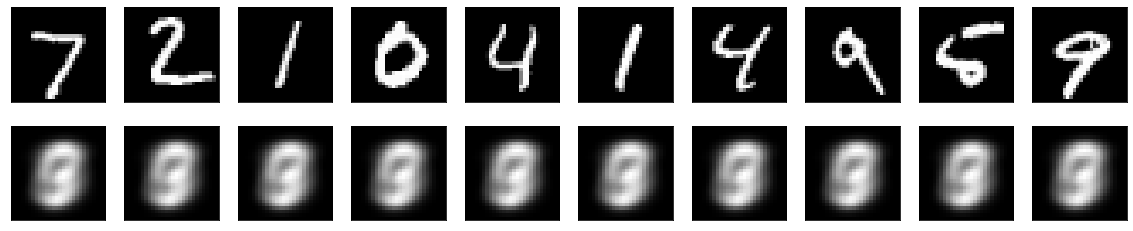

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
from keras import regularizers
import numpy as np

# Wymiary obrazków MNIST
input_dim = 784

# Wyznaczamy wymiary warstw kodera i dekodera
encoding_dim1 = 256
encoding_dim2 = 128
encoding_dim3 = 64

# Parametr regularyzacji rzadkości
sparsity_factor = 0.1

# Definiujemy warstwy kodera
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim1, activation='relu', activity_regularizer=regularizers.l1(sparsity_factor))(input_img)
encoded = Dense(encoding_dim2, activation='relu', activity_regularizer=regularizers.l1(sparsity_factor))(encoded)
encoded = Dense(encoding_dim3, activation='relu', activity_regularizer=regularizers.l1(sparsity_factor))(encoded)

# Definiujemy warstwy dekodera
decoded = Dense(encoding_dim2, activation='relu')(encoded)
decoded = Dense(encoding_dim1, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Tworzymy model autoenkodera
autoencoder = Model(input_img, decoded)

# Kompilujemy model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Wczytujemy zbiór danych MNIST
(x_train, _), (x_test, _) = mnist.load_data()

# Normalizujemy i przekształcamy dane
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Trenujemy model
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Wizualizacja wyników
import matplotlib.pyplot as plt

# Zastosuj model na zestawie testowym
decoded_imgs = autoencoder.predict(x_test)

# Wypisz kilka obrazków testowych i odpowiadające im dekodowane wersje
n = 10  # Ile obrazków chcesz wyświetlić
plt.figure(figsize=(20, 4))
for i in range(n):
    # Obrazek testowy
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Odpowiadający mu obrazek zdekodowany przez model
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

## Autoenkodery kurczliwe (ang. contractive autoencoders)



Epoch 1/10
235/235 [==============================] - 2s 5ms/step - loss: 0.2303 - val_loss: 0.1507
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1343 - val_loss: 0.1202
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1137 - val_loss: 0.1064
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1034 - val_loss: 0.0990
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0974 - val_loss: 0.0945
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0936 - val_loss: 0.0914
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0908 - val_loss: 0.0890
Epoch 8/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0887 - val_loss: 0.0872
Epoch 9/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0870 - val_loss: 0.0858
Epoch 10/10
313/313 [==============================] - 1s 1ms/step


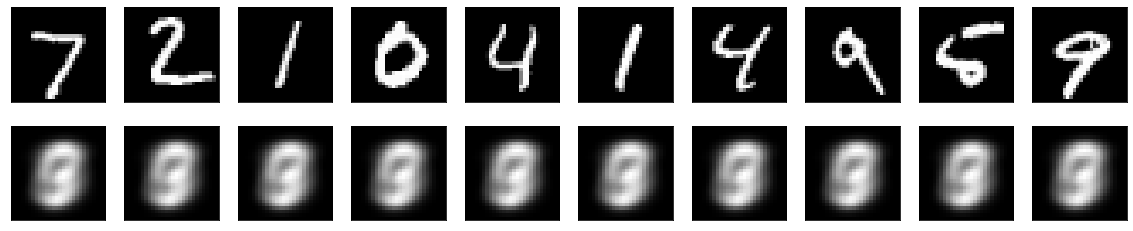

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers
import numpy as np

# Load MNIST dataset
from keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and flatten input data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define contractive autoencoder model
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

# Create model
autoencoder = Model(input_img, decoded)

# Compile model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train model
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode test set
encoded_imgs = autoencoder.predict(x_test)

# Wypisz kilka obrazków testowych i odpowiadające im dekodowane wersje
n = 10  # Ile obrazków chcesz wyświetlić
plt.figure(figsize=(20, 4))
for i in range(n):
    # Obrazek testowy
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Odpowiadający mu obrazek zdekodowany przez model
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

## Autoenkodery wariacyjne (ang. variational autoencoders)


Epoch 1/2
469/469 [==============================] - 5s 5ms/step - loss: 0.3046 - val_loss: 0.2654
Epoch 2/2
1/1 [==============================] - 0s 17ms/step


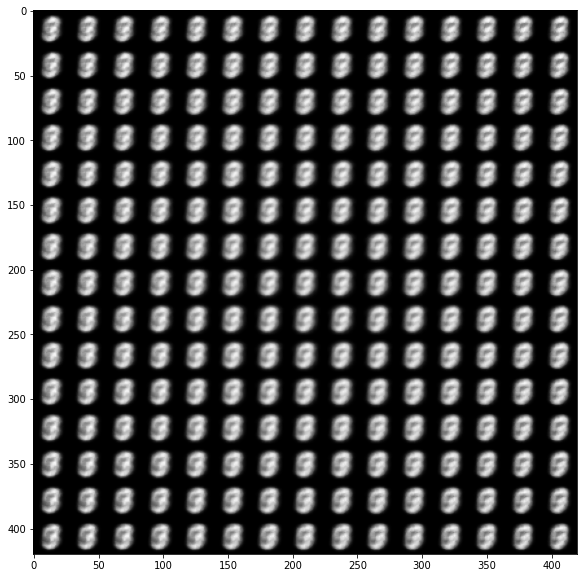

In [ ]:
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras.datasets import mnist
from keras.losses import binary_crossentropy
from keras import backend as K
import numpy as np

# Define the dimensions of the latent space
latent_dim = 2

# Define the input shape
input_shape = (784,)

# Define the encoder architecture
input_layer = Input(shape=input_shape)
hidden_layer = Dense(512, activation='relu')(input_layer)
z_mean = Dense(latent_dim)(hidden_layer)
z_log_var = Dense(latent_dim)(hidden_layer)

# Define the sampling function
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=1.)
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

# Use the sampling function to sample from the latent space
z = Lambda(sampling)([z_mean, z_log_var])

# Define the decoder architecture
decoder_input = Input(shape=(latent_dim,))
decoder_hidden = Dense(512, activation='relu')(decoder_input)
decoder_output = Dense(784, activation='sigmoid')(decoder_hidden)

# Define the models
encoder = Model(input_layer, [z_mean, z_log_var, z], name='encoder')
decoder = Model(decoder_input, decoder_output, name='decoder')
vae_output = decoder(encoder(input_layer)[2])
vae = Model(input_layer, vae_output, name='vae')

# Define the loss function
reconstruction_loss = binary_crossentropy(input_layer, vae_output)
kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(reconstruction_loss + kl_loss)

# Compile the model
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(x_train.shape[0], np.prod(x_train.shape[1:]))
x_train = x_train.astype('float32') / 255.
x_test = x_test.reshape(x_test.shape[0], np.prod(x_test.shape[1:]))
x_test = x_test.astype('float32') / 255.

# Train the model
vae.fit(x_train, epochs=2, batch_size=128, validation_data=(x_test, None))


import matplotlib.pyplot as plt

def display_vae_results(vae, x_test):
    # Encode the test images
    encoder = vae.get_layer('encoder')
    z_mean, _, _ = encoder.predict(x_test)

    # Generate new images by sampling from the learned distribution
    decoder = vae.get_layer('decoder')
    n = 15  # number of images to generate
    digit_size = 28
    figure = np.zeros((digit_size * n, digit_size * n))

    # Sample from the learned distribution
    grid_x = np.linspace(-4, 4, n)
    grid_y = np.linspace(-4, 4, n)[::-1]
    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[i * digit_size: (i + 1) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = digit

    # Plot the generated images
    plt.figure(figsize=(10, 10))
    plt.imshow(figure, cmap='Greys_r')
    plt.show()

# Generate and display new images
display_vae_results(vae, x_test)

# *Zadanie 2* - Podstawy Autoenkoderów (Max 1h 15min):

**Zaimplementuj** wszysytkie typy autoenkoderów dla zbioru danych:

* CIFAR-100 (wykorzystaj wbudowany modul z biblioteki Keras)

Wykorzystaj inne Optymalizatory oraz bardziej zaawansowana architekture niż w przykładach. Jak należy interpretować osiagniete wyniki dla CIFAR-10? W celu zrozumienia autoencoderów zapoznaj się z załaczonymi materiałami.

# Materiały

Autoenkodery:
* https://www.unite.ai/what-is-an-autoencoder/ (wraz z rodzajami) 
* https://www.tensorflow.org/tutorials/generative/autoencoder
* https://www.mygreatlearning.com/blog/autoencoder/ 
* https://towardsdatascience.com/auto-encoder-what-is-it-and-what-is-it-used-for-part-1-3e5c6f017726 
* https://iq.opengenus.org/types-of-autoencoder/
* https://www.jeremyjordan.me/autoencoders/ 
* https://www.deeplearningbook.org/contents/autoencoders.html
* https://www.mygreatlearning.com/blog/autoencoder/
* https://www.tensorflow.org/tutorials/generative/autoencoder?hl=pl
* https://medium.com/pytorch/implementing-an-autoencoder-in-pytorch-19baa22647d1
* https://www.tutorialspoint.com/how-to-implementing-an-autoencoder-in-pytorch
* https://github.com/AlexPasqua/Autoencoders 

Youtube:

* https://www.youtube.com/watch?v=JoR5HCs0n0s
* https://www.youtube.com/watch?v=1h-KUgGSrsk 
* https://www.youtube.com/watch?v=8wrLjnQ7EWQ

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - loss: 0.6581 - val_loss: 0.6160
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 18s 94ms/step - loss: 0.6099 - val_loss: 0.6006
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - loss: 0.5992 - val_loss: 0.5966
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 25s 114ms/step - loss: 0.5944 - val_loss: 0.5929
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - loss: 0.5919 - val_loss: 0.5914
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 23s 101ms/step - loss: 0.5901 - val_loss: 0.5898
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - loss: 0.5879 - val_loss: 0.5894
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - loss: 0.5864 - val_loss: 0.5865
Epoch 9/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - loss: 0.5859 - val_loss: 0.5864
Epoch 10/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - loss: 0.5843 - val_loss: 0.5847
Epoch 11/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 18s 90ms/step - loss: 0

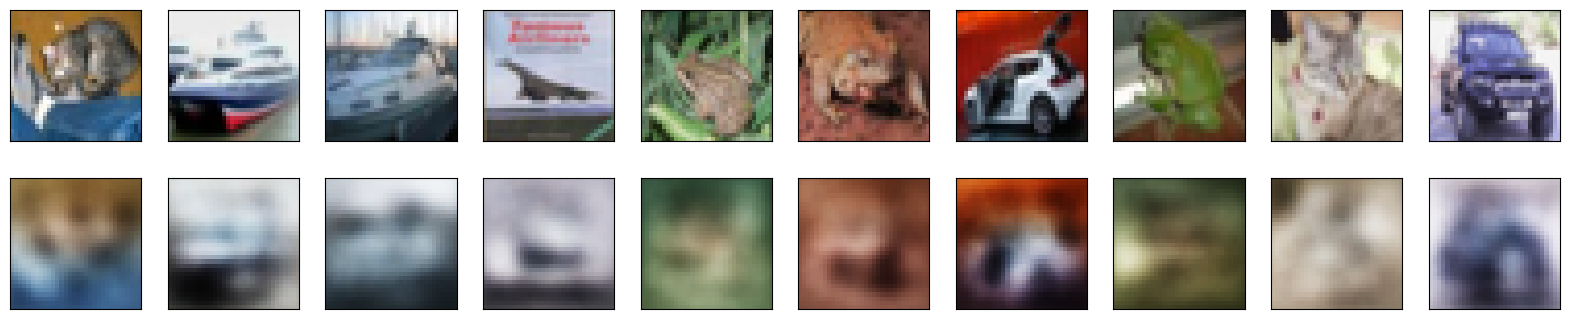

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import cifar10

# CIFAR-10 image dimensions
input_dimensions = 3072

# Encoder and decoder layer dimensions
encoder_dim1 = 256
encoder_dim2 = 128
encoder_dim3 = 64

# Encoder layers
input_layer = Input(shape=(input_dimensions,))
encoder_layer1 = Dense(encoder_dim1, activation='relu')(input_layer)
encoder_layer2 = Dense(encoder_dim2, activation='relu')(encoder_layer1)
encoder_layer3 = Dense(encoder_dim3, activation='relu')(encoder_layer2)

# Decoder layers
decoder_layer1 = Dense(encoder_dim2, activation='relu')(encoder_layer3)
decoder_layer2 = Dense(encoder_dim1, activation='relu')(decoder_layer1)
output_layer = Dense(input_dimensions, activation='sigmoid')(decoder_layer2)

# Autoencoder model
autoencoder_model = Model(input_layer, output_layer)

# Compile the model
autoencoder_model.compile(optimizer='adam', loss='binary_crossentropy')

# Load CIFAR-10 dataset
(train_images, _), (test_images, _) = cifar10.load_data()

# Normalize and flatten the data
train_images = train_images.astype('float32') / 255.
test_images = test_images.astype('float32') / 255.
train_images = train_images.reshape((len(train_images), np.prod(train_images.shape[1:])))
test_images = test_images.reshape((len(test_images), np.prod(test_images.shape[1:])))

# Train the model
autoencoder_model.fit(train_images, train_images,
                      epochs=50,
                      batch_size=256,
                      shuffle=True,
                      validation_data=(test_images, test_images))

# Use the model on the test set
decoded_images = autoencoder_model.predict(test_images)

# Display some test images and their decoded versions
num_images = 10  # How many images to display
plt.figure(figsize=(20, 4))
for i in range(num_images):
    # Display original test image
    ax_original = plt.subplot(2, num_images, i + 1)
    plt.imshow(test_images[i].reshape(32, 32, 3))
    plt.gray()
    ax_original.get_xaxis().set_visible(False)
    ax_original.get_yaxis().set_visible(False)

    # Display decoded image
    ax_decoded = plt.subplot(2, num_images, i + 1 + num_images)
    plt.imshow(decoded_images[i].reshape(32, 32, 3))
    plt.gray()
    ax_decoded.get_xaxis().set_visible(False)
    ax_decoded.get_yaxis().set_visible(False)
plt.show()
